In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

C:\Users\Ahmad Kazeem\AppData\Local\Temp\ipykernel_10716\506599467.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(medical_df.corr(), cmap='Reds', annot=True);


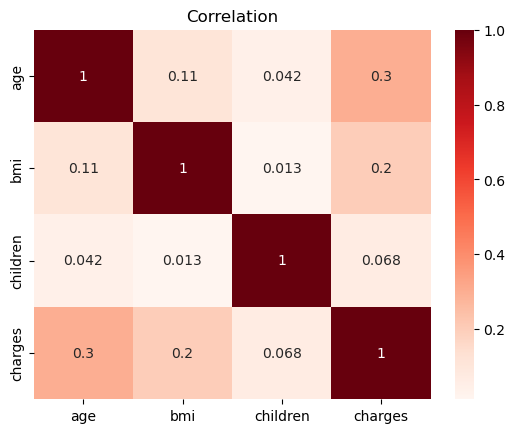

In [2]:
medical_df = pd.read_csv("medical_data.csv")
sns.heatmap(medical_df.corr(), cmap='Reds', annot=True);
plt.title("Correlation");


Correlation Vs causation fallacy: Note that high correlation can not be used to interprete a cause-effect relation between features. Two features X and Y can be correlated if X causes Y or if Y causes X, or if both caused independently by some other factor X, and the correlation will no longer hold true if one of the cause effect relationships is broken. Its also possible that X and Y simply appear to be correlated because the sample is too small.

While this may seem obvious, computers can differentiate between correlation and causation, and decisions based on automated system can often have major consequencies on societ, so its important to study why automated systems lead to a given result. Determining cause-effect relationships require human insights

### Linear Regression using single feature

<Axes: xlabel='age', ylabel='charges'>

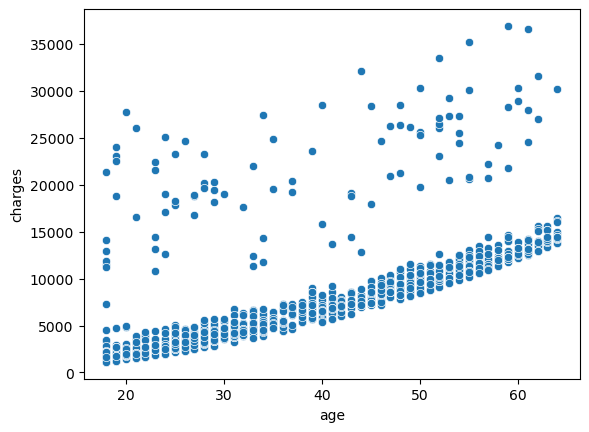

In [3]:
non_smoker_df = medical_df[medical_df['smoker']== 'no']
sns.scatterplot(non_smoker_df, x='age', y='charges')

$ y = ax + b $
#### Now the equations is:
$charges = ages *x + b $
The line is characterizes two numbers $ a $ is called slope and $ b $ is the intercept

#### This technique is called linear regression and the formula is a linear regression model

In [4]:
def estimate_charges(age, a, b):
    return age * a + b


TypeError: float() argument must be a string or a real number, not 'function'

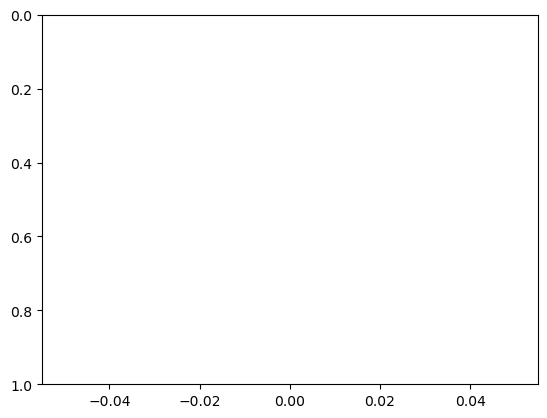

In [5]:
non_smoker_age = non_smoker_df.age
non_smoker_charges = non_smoker_df.charges
charge = estimate_charges(non_smoker_age, 50, 120)
sns.scatterplot(x=non_smoker_age, y=estimate_charges)

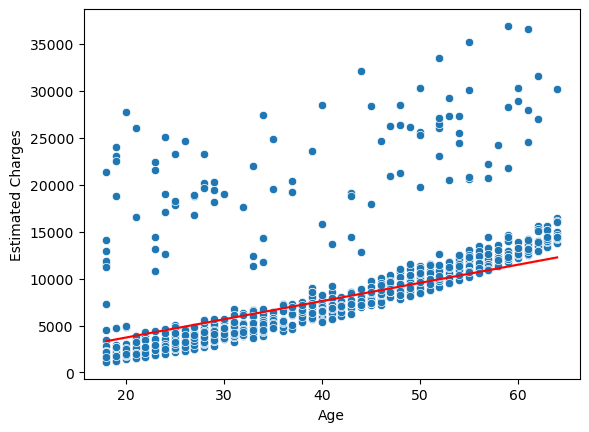

In [6]:
estimate = estimate_charges(non_smoker_age, 194, -160)
estimate
fig, ax = plt.subplots()

sns.lineplot(x=non_smoker_age, ax=ax, c='r', y=estimate)
sns.scatterplot(non_smoker_df, x='age', y='charges')
plt.ylabel("Estimated Charges")
plt.xlabel("Age")
plt.show()


### Loss/Cost Function
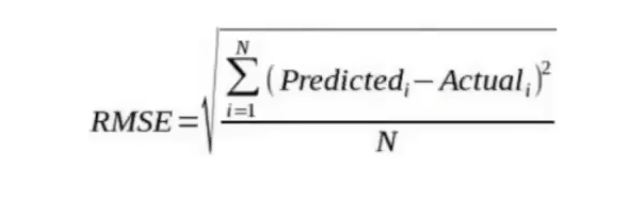

In [7]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets-predictions)))
def secf(targets, predictions):
    return (np.square(np.mean(targets-predictions)))

In [12]:
targets = non_smoker_df['charges']
predictions = estimate_charges(non_smoker_age, 194, -160)
rmse(targets, predictions)
print(secf(targets, predictions))

909186.3904126248


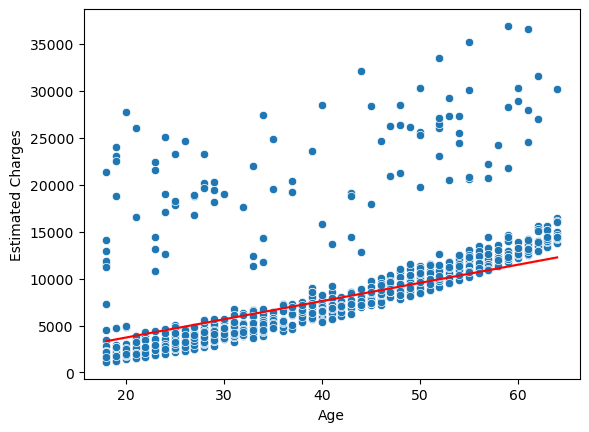

RMSE:  4869.428446390595


In [20]:
def test_parameters(a, b):
    ages = non_smoker_df.age
    charges = non_smoker_df.charges
    predictions = estimate_charges(non_smoker_age, a, b)
    
    fig, ax = plt.subplots()

    sns.lineplot(x=ages, ax=ax, c='r', y=predictions)
    sns.scatterplot(non_smoker_df, x='age', y='charges')
    plt.ylabel("Estimated Charges")
    plt.xlabel("Age")
    plt.show()
    print("RMSE: ", rmse(charges, predictions))
test_parameters(194, -160)

### Optimizer
- Ordinary Least Squares: Better for smaller datasets
- Stochastic gradient descent: Better for larger datastes

ordinary least squares directly computes the best value for a and b using matrix operations, while gradient descent uses an iterative approact starting with random values for a and b ans slowly improving them using derivatives

### Linear Regression using Scikit-Learn

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
model = LinearRegression()

In [23]:
inputs = non_smoker_df[['age']] # model.fit requires 2 dimension
targets = non_smoker_df.charges
model.fit(inputs, targets)

LinearRegression()

In [24]:
model.predict(np.array([[20], [30]]))

C:\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3253.55770006, 5926.04682837])

In [25]:
predictions = model.predict(non_smoker_df[['age']])
rmse(targets, predictions)

4662.505766636395

In [26]:
# a 
model.coef_

array([267.24891283])

In [27]:
# b
model.intercept_

-2091.4205565650827

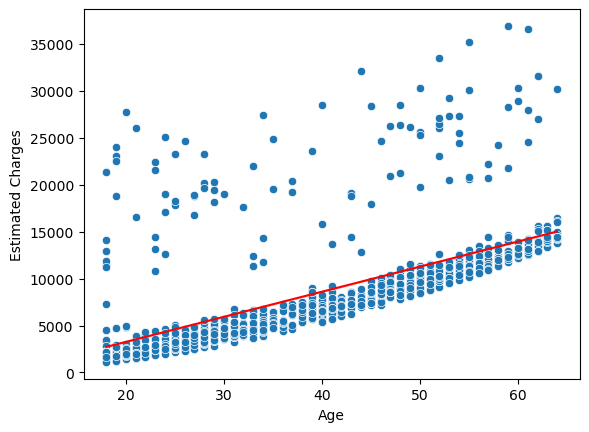

RMSE:  4662.505766636395


In [28]:
test_parameters(model.coef_, model.intercept_)

### For the stochastic gradient use SGDRegressor

In [29]:
from sklearn.linear_model import SGDRegressor

In [30]:
modelSGD = SGDRegressor()
modelSGD.fit(inputs, targets)

SGDRegressor()

In [31]:
modelSGD.predict(inputs)

array([2441.3302373 , 7109.10009461, 9442.98502326, ..., 2441.3302373 ,
       2441.3302373 , 3841.6611945 ])

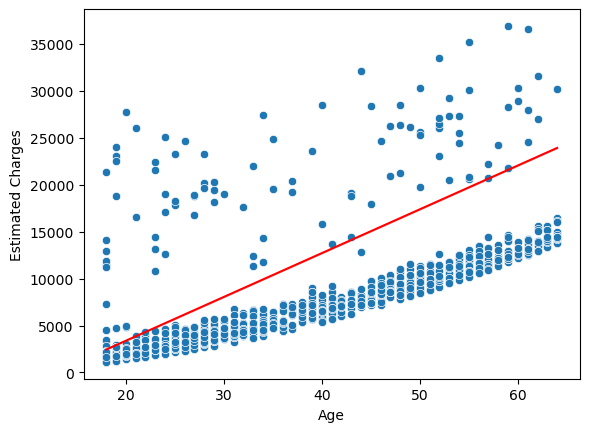

RMSE:  6748.47541655789


In [32]:
test_parameters(modelSGD.coef_, modelSGD.intercept_)

Every machine learning has 3 components
Machine learning is the process of computing the best parameters to model relationship between some features and targets
1. Model
2. Cost Function
3. Optimizer
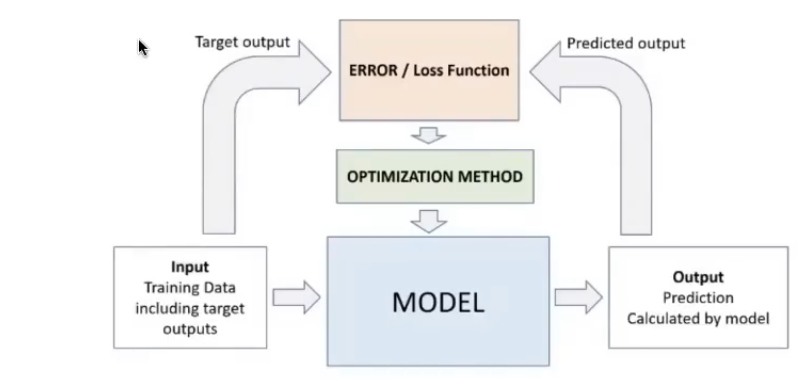


### Linear regression with multiple features
$ charges = a1 * age + a2 * bmi + b $

In [33]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

inputs, targets = non_smoker_df.drop(['charges', 'sex', 'smoker', 'region'], axis=1), non_smoker_df['charges']
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
loss = rmse(targets, predictions)
loss


4608.470405038247

In [81]:
non_smoker_df.charges.corr(non_smoker_df.bmi)
# The bmi has a very weak correlation with charges

0.08403654312833271

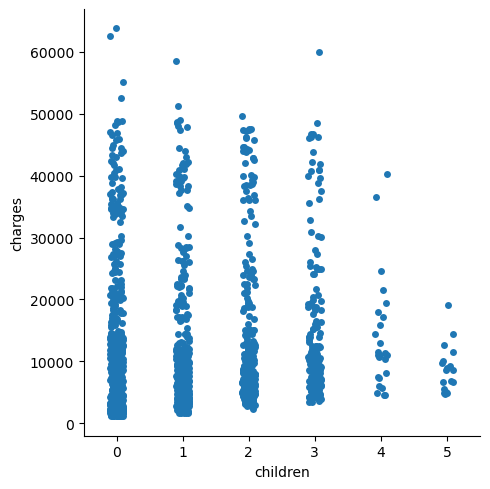

In [82]:
sns.catplot(medical_df, jitter=True, x='children', y='charges')

In [83]:
inputs, targets = non_smoker_df[['age', 'bmi', 'children']], non_smoker_df['charges']
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
loss = rmse(targets, predictions)
loss

4608.470405038247

In [84]:
model.coef_

array([265.2938443 ,   5.27956313, 580.65965053])

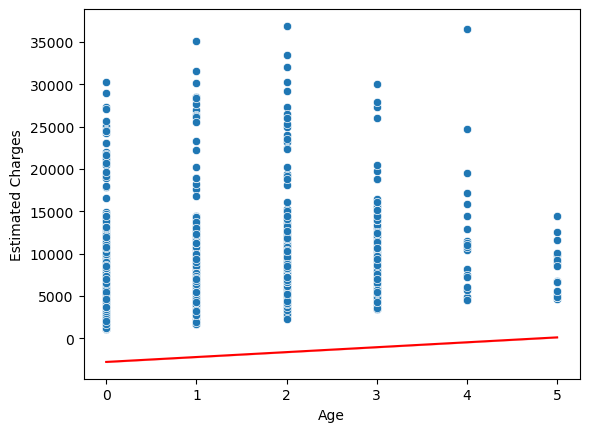

RMSE:  12157.206058624372


In [85]:
def test_parameter(c, a, b):
    vals = non_smoker_df[c]
    charges = non_smoker_df.charges
    predictions = estimate_charges(vals, a, b)
    
    fig, ax = plt.subplots()

    sns.lineplot(x=vals, ax=ax, c='r', y=predictions)
    sns.scatterplot(non_smoker_df, x=c, y='charges')
    plt.ylabel("Estimated Charges")
    plt.xlabel("Age")
    plt.show()
    print("RMSE: ", rmse(charges, predictions))
    
test_parameter('children', model.coef_[-1], model.intercept_)

loss=rmse(targets, predictions)


#### Categorical features for machine learning

<Axes: xlabel='smoker_code', ylabel='charges'>

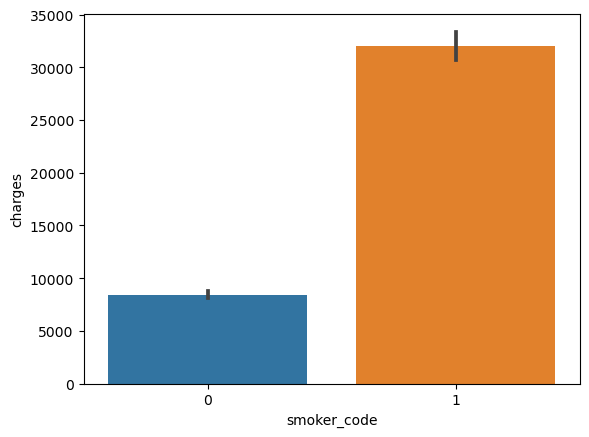

In [86]:
medical_df['smoker_code']  = medical_df['smoker'].map({"no":0, "yes":1})
sns.barplot(medical_df, x='smoker_code', y='charges')
# sns.countplot(medical_df, x='smoker_code')

In [87]:
medical_df.charges.corr(medical_df.smoker_code)

0.7872514304984785

In [88]:
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code']], medical_df['charges']
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
loss = rmse(targets, predictions)
loss

# the loss reduced from 11355 to 6056

6056.439217188081

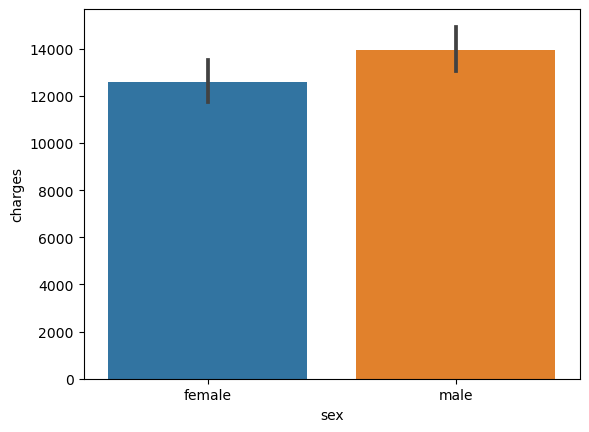

In [89]:
sns.barplot(medical_df, x='sex', y='charges');

In [90]:
medical_df['sex_code'] = medical_df.sex.map({"female":0, "male":1})
medical_df.charges.corr(medical_df.sex_code)

0.05729206220202527

#### One hot encoding

In [91]:
import sklearn.preprocessing as skprocess

In [92]:
encoder = skprocess.OneHotEncoder()
encoder.fit(medical_df[['region']])

OneHotEncoder()

In [93]:
one_hot = encoder.transform(medical_df[['region']]).toarray()

In [94]:
medical_df[encoder.categories_[0] + " code"] = one_hot

In [95]:
all_medical_df = medical_df.drop(['sex', 'smoker', 'region', 'charges'], axis=1)
inputs, targets = all_medical_df, medical_df['charges']
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
loss = rmse(targets, predictions)
loss

6041.679651174452

In [96]:
model.coef_

array([  256.85635254,   339.19345361,   475.50054515, 23848.53454191,
        -131.3143594 ,   587.00923503,   234.0453356 ,  -448.01281436,
        -373.04175627])

In [97]:
model.predict([[19, 27.9, 0, 1, 0, 0, 0, 0, 1]])

C:\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([25293.7130284])

In [98]:
all_medical_df
medical_df.loc[(medical_df['age']== 19) & (medical_df['bmi']== 27.9)][:]

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast code,northwest code,southeast code,southwest code
0,19,female,27.9,0,yes,southwest,16884.924,1,0,0.0,0.0,0.0,1.0


In [99]:
# medical_df.charges.corr(all_medical_df.smoker_code)

### Feature scaling

$ charges = a1 * age + a2 * bmi + a3 * children + a4 * smoker + a5 * sex + a6 * region + b $

In [100]:
model.coef_

array([  256.85635254,   339.19345361,   475.50054515, 23848.53454191,
        -131.3143594 ,   587.00923503,   234.0453356 ,  -448.01281436,
        -373.04175627])

In [101]:
model.intercept_

-12525.547811195444

In [102]:
predictions = model.predict([[]])

C:\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: Found array with 0 feature(s) (shape=(1, 0)) while a minimum of 1 is required by LinearRegression.

In [103]:
weights_df = pd.DataFrame(dict(feature=np.append(all_medical_df.columns, "intercept"), weights=np.append(model.coef_, model.intercept_)))
weights_df


,feature,weights
0,age,256.856353
1,bmi,339.193454
2,children,475.500545
3,smoker_code,23848.534542
4,sex_code,-131.314359
5,northeast code,587.009235
6,northwest code,234.045336
7,southeast code,-448.012814
8,southwest code,-373.041756
9,intercept,-12525.547811


In [104]:
estimate_charges(13, model.coef_[0], model.intercept_)
# as you can see the values ar every wrong

-9186.415228209917

While it seems like BMI and the northeast have a higher weight than age, keep in mind that the range of values for BMI is limited (15 to 40) and the northeast column only takes the values 0 and 1

Because different columns have different ranges, we run into two issues:
1. We can't compare the weights of different column to identify which features are important
2. A column with larger range of inputs may disproportionately affect the loss and dominate the optimization process.
For this reason its common to practice to scale or standardize the values in numeric column by suntracting the mean and dividing by the standard deviation
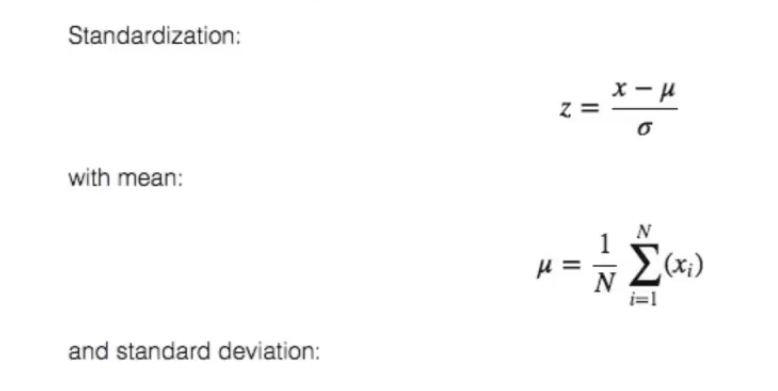


In [105]:
numeric_cols = np.array(['age', 'bmi', 'children'])

In [106]:
scaler = skprocess.StandardScaler()
scaler.fit(medical_df[numeric_cols])

StandardScaler()

In [107]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [108]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

In [109]:
# Hence we scale the data
scaled_inputs = scaler.transform(medical_df[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [110]:
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [111]:
categorical_cols = medical_df.columns[~medical_df.columns.isin(np.append(numeric_cols, ["sex", "charges", "smoker", "region"]))]

In [112]:
inputs = np.concatenate((scaled_inputs, medical_df[categorical_cols]), axis=1)


In [113]:
model = LinearRegression()
model.fit(inputs, targets)
predictions = model.predict(inputs)

In [114]:
rmse(targets, predictions)

6041.679651174452

In [115]:
weights_df = pd.DataFrame(dict(feature=np.append(np.concatenate((numeric_cols, categorical_cols)), "intercept"), weights=np.append(model.coef_, model.intercept_)))
weights_df

,feature,weights
0,age,3607.472736
1,bmi,2067.691966
2,children,572.998210
3,smoker_code,23848.534542
4,sex_code,-131.314359
5,northeast code,587.009235
6,northwest code,234.045336
7,southeast code,-448.012814
8,southwest code,-373.041756
9,intercept,8466.483215


In [116]:
estimate_charges(20, weights_df['weights'][0], weights_df['weights'][9])

80615.93793929547

In [117]:
rmse(targets, predictions)

6041.679651174452

### Summary
#### How to approach machine learning python
1. Explore the data and find correlations between inputs and targets
2. Pick the right model, loss functions and optimizer for the problem at hand
3. Scale numeric variables and one-hot encoder categorical data
4. Set aside a test set (using a fraction of the training set)
5. Train the model
6. Make predictions on the test set and compute loss

### Creating a test set
Models like the onw we've created in this tutorial are designed to be used in real world. It's common practice to set aside a small fraction of the data (e.g 10%) just for testing and reporting the results of the model.

In [118]:
from sklearn.model_selection import train_test_split

In [119]:
inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=0.1)
#90 percent of the data used for training and 10% of the data for testing

In [120]:
model = LinearRegression().fit(inputs_train, targets_train)

In [121]:
prediction_test = model.predict(inputs_test)
rmse(targets_test, prediction_test)

6898.148881340799

In [122]:
prediction_train = model.predict(inputs_train)
rmse(targets_train, prediction_train)
# The train (90%) has a higher number of datasets than that of the tested (10%) hence there are high chances of over fitting

5942.408006823234

### Logistic Regression
- Download real world dataset from kaggle
- Exploratory data analysis and visualization
- Splitting a dataset into training, validation and test sets
- Filling/imputing missing values in numeric columns
- Scaling numeric features to a (0, 1) range
- Encoding categorical columns as one-hot vectors
- Training a logistic regression model using Scikit-learn
- Evaluating a model using a validation set and test set
- Saving a model to disk and loading it back

<h1> Classification Problems </h1>
Problems where each input must be assigned to a descrete category (also called label or class) are known as classification problems
Here are some examples of classification problems:

- <b>Rainfall prediction</b>: Predicting whether it will rain tomorrow using today's weather (classes will be "Will Rain" and "Will not rain")

- <b> Breast cancer prediction </b>: Predicting whether a tumor is 'bengin (noncancerous)' or 'malignant (cancerous)' using information like radius, texture, etc

- <b>Loan Repayment Prediction</b>: Predicting whether applicants will repay a home loan based on factors like age, income, loan amount, no. of children etc.

- <b>Handwritten Digit Recognition</b>: Identifying which digit from 0 to 9 a picture of handwritten text represents

Classifiation problems can be binary (yes/no)

<h2>Regression Problems</h2>
Problems where a continuous numeric value must be predicted for each input are known as regression problem
Here are some examples:

- Medical charges prediction
- House price prediction
- Ocean Temperature Prediction
- Weather Temperature Prediction

<h2>Linear Rregression for solving problems</h2>
Linear regression is a commonly used technique for solving regression problems. In a linear regression model, the target is modeled as a linear combination (or weightesd sum) of input features. The predictions from the model are evaluated using a loss function like the Root Mean Squared Error.

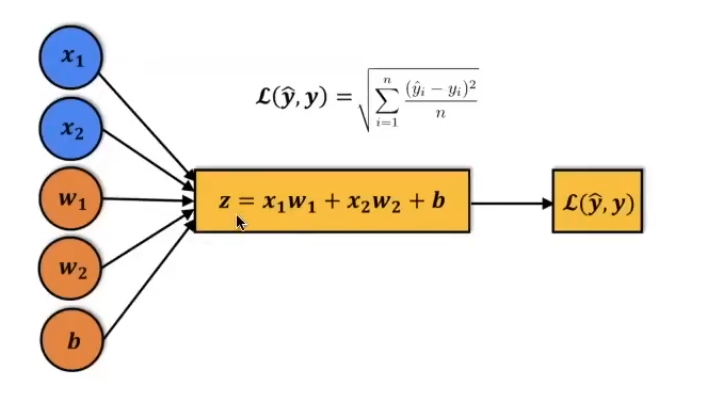


#### Logistic regresssion is a commonly used technique for solving binary classification problems
- We take linear combination (or weighted sum of the input features)
- We apply the sigmoid function to the result to obtain a number of 0 and 1
- this number represents the probability of the input being classified as "Yes"
- Instead of RMSE, the cross entropy loss functions is used to evaluate the results

Summary of logistic regression:

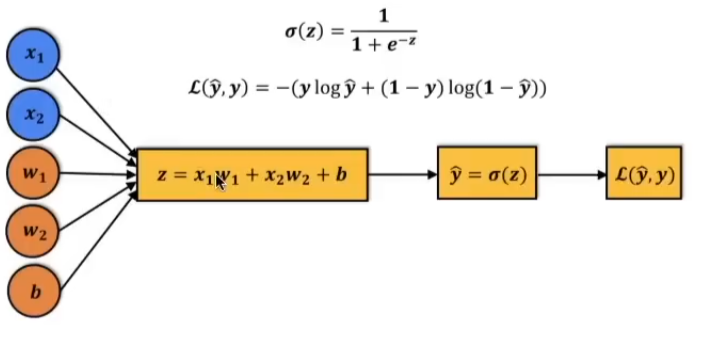